In [1]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from itertools import combinations
import itertools
import plind.contour_dict as cdict
import plind.contour as ctr

In [2]:
ndim = 2
domain = (-1, 1, -1, 1)
Nx = 2
Ny = 2

In [3]:
x, y = np.meshgrid(np.linspace(-1, 1, Nx), np.linspace(-1, 1, Ny))
points = (x+1j*y).flatten()
points_tuple = np.dstack((x.flatten(), y.flatten()))[0]

In [4]:
tri = Delaunay(points_tuple)

In [5]:
edges = np.array(list(combinations(tri.simplices[0], 2)))
for i, simp in enumerate(tri.simplices):
    if i != 0:
        for new_edge in np.array(list(combinations(simp, 2))):
            if not any (np.isin(edges, new_edge).sum(axis=-1) == 2):
                edges = np.append(edges, [new_edge], axis=0)

In [6]:
edges

array([[3, 2],
       [3, 0],
       [2, 0],
       [1, 3],
       [1, 0]], dtype=int32)

In [7]:
tri.simplices

array([[3, 2, 0],
       [1, 3, 0]], dtype=int32)

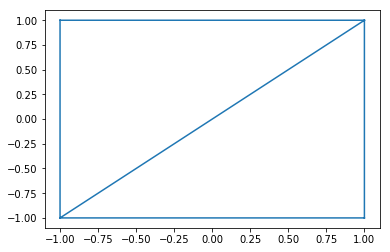

In [8]:
plt.figure()
plt.triplot(points_tuple[:,0], points_tuple[:,1], tri.simplices.copy())
plt.show()

In [14]:
contour = cdict.realcontour_nd(2, (-1,1,-1,1,-1,1))

In [16]:
contour.simplices

array([[5, 4, 2, 0],
       [5, 1, 2, 0],
       [5, 6, 4, 2],
       [5, 6, 7, 2],
       [5, 3, 1, 2],
       [5, 3, 7, 2]], dtype=int32)

In [17]:
contour.edges

array([[5, 4],
       [5, 2],
       [5, 0],
       [4, 2],
       [4, 0],
       [2, 0],
       [5, 1],
       [1, 2],
       [1, 0],
       [5, 6],
       [6, 4],
       [6, 2],
       [5, 7],
       [6, 7],
       [7, 2],
       [5, 3],
       [3, 1],
       [3, 2],
       [3, 7]], dtype=int32)